# Exploratory Data Analysis (EDA)

* [Structure Investigation](#Structure-Investigation)
    * [Structure of non-numerical features](#Structure-of-non-numerical-features)
    * [Structure of numerical features](#Structure-of-numerical-features)
* [Quality Investigation](#Quality-Investigation)
    * [Duplicates](#Duplicates)
    * [Missing Values](#Missing-Values)
        * [Per Samples](#Per-Samples)
        * [Per Features](#Per-Features)
    * [Outlier Entries](#Outlier-Entries)
        * [Numerical features](#Numerical-features)
* [Content Investigation](#Content-Investigation)
    * [Feature distribution](#Feature-distribution)
    * [Continuous features](#Continuous-features)
    * [Feature relationships](#Feature-relationships)

In [1]:
from tqdm import tqdm
import pandas as pd
from wordcloud_fa import WordCloudFa
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import ast

In [2]:
tqdm.pandas()

In [3]:
base_path = '../data/'

tweets_path = base_path + 'remote_tweets.csv'

In [4]:
tweets_df = pd.read_csv(tweets_path, low_memory=False)
tweets_df.head()

,conversation_id,retweets_count,mentions,created_at,likes_count,in_reply_to_user_id,_id,source,user_id,in_reply_to_status_id,tweet,replies_count,quoted_status_id,hashtags,cashtags,urls
0,1375557622410149894,2,NaN,2021-03-26 21:23:21+00:00,111,572051429.0,1375559020451356674,Twitter for iPhone,572051429,1.375558e+18,به من گزارش میده حقوقش میدونم سالی ۸۵تا، همسرش...,3,NaN,NaN,NaN,NaN
1,1375559420176908296,3,NaN,2021-03-26 21:24:57+00:00,163,NaN,1375559420176908296,Twitter for iPhone,812764546012246017,NaN,اینایی که رفتن سفر، مهمونی و... هیچ پروتکلی هم...,1,NaN,NaN,NaN,NaN
2,1383828354197979136,2,NaN,2021-04-18 17:02:44+00:00,37,NaN,1383828354197979136,Twitter for Android,985101690536898565,NaN,دارم فکر میکنم که چقدر خسته ام با اینکه امروز ...,3,NaN,NaN,NaN,NaN
3,1383840315031781385,0,NaN,2021-04-18 17:50:16+00:00,11,NaN,1383840315031781385,Twitter Web App,310871673,NaN,یک سال و نیمه از قبل آبان ۹۸ دورکار شدم تا الان,1,1.383657e+18,NaN,NaN,NaN
4,1383820625354002439,1,['15782990'],2021-04-18 17:31:42+00:00,9,15782990.0,1383835643239747593,Twitter Web App,1271095835028307969,1.383821e+18,@shahrzaad حتمن میرفتم به شهری که به اقوام یا ...,1,NaN,NaN,NaN,NaN


# Structure Investigation

In [5]:
tweets_df.shape

(45359, 16)

In [6]:
pd.value_counts(tweets_df.dtypes)

object     7
int64      6
float64    3
dtype: int64

## Structure of non-numerical features

In [7]:
tweets_df.select_dtypes(exclude="number").head()

,mentions,created_at,source,tweet,hashtags,cashtags,urls
0,NaN,2021-03-26 21:23:21+00:00,Twitter for iPhone,به من گزارش میده حقوقش میدونم سالی ۸۵تا، همسرش...,NaN,NaN,NaN
1,NaN,2021-03-26 21:24:57+00:00,Twitter for iPhone,اینایی که رفتن سفر، مهمونی و... هیچ پروتکلی هم...,NaN,NaN,NaN
2,NaN,2021-04-18 17:02:44+00:00,Twitter for Android,دارم فکر میکنم که چقدر خسته ام با اینکه امروز ...,NaN,NaN,NaN
3,NaN,2021-04-18 17:50:16+00:00,Twitter Web App,یک سال و نیمه از قبل آبان ۹۸ دورکار شدم تا الان,NaN,NaN,NaN
4,['15782990'],2021-04-18 17:31:42+00:00,Twitter Web App,@shahrzaad حتمن میرفتم به شهری که به اقوام یا ...,NaN,NaN,NaN


In [8]:
tweets_df.describe(exclude="number")

,mentions,created_at,source,tweet,hashtags,cashtags,urls
count,16139,45359,45359,45359,7632,1,6974
unique,11157,45256,165,44936,4738,1,5872
top,['885835554776121344'],2020-09-21 10:17:24+00:00,Twitter for Android,دستگاه چاپ نایلون ؛ کار در منزل https://t.co/...,['دورکاری'],['zoom'],['https://silkomohr.ir/%d8%af%d8%b3%d8%aa%da%a...
freq,147,3,20451,97,812,1,106


## Structure of numerical features

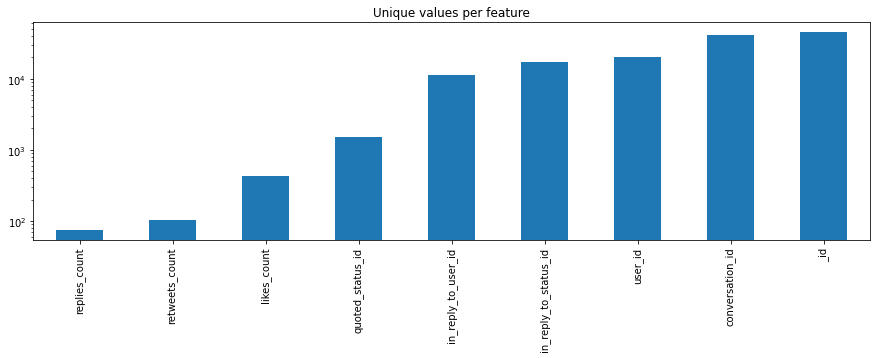

In [9]:
unique_values = tweets_df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [10]:
tweets_df.describe()

,conversation_id,retweets_count,likes_count,in_reply_to_user_id,_id,user_id,in_reply_to_status_id,replies_count,quoted_status_id
count,4.535900e+04,45359.000000,45359.000000,1.801400e+04,4.535900e+04,4.535900e+04,1.794300e+04,45359.000000,1.619000e+03
mean,1.272666e+18,0.786525,13.302586,6.121627e+17,1.273023e+18,5.670170e+17,1.323267e+18,0.889482,1.309835e+18
std,2.121834e+17,8.060983,111.582047,5.373889e+17,2.120721e+17,5.347067e+17,1.461335e+17,4.052308,1.339289e+17
min,1.606378e+17,0.000000,0.000000,7.552000e+03,1.606378e+17,7.552000e+03,1.781671e+17,0.000000,6.369977e+17
25%,1.238773e+18,0.000000,1.000000,1.354114e+09,1.238872e+18,1.420713e+09,1.260260e+18,0.000000,1.246545e+18
50%,1.320343e+18,0.000000,2.000000,8.186766e+17,1.320608e+18,7.506018e+17,1.338788e+18,0.000000,1.322818e+18
75%,1.401964e+18,0.000000,9.000000,1.082342e+18,1.402174e+18,1.051798e+18,1.415407e+18,1.000000,1.393869e+18
max,1.531740e+18,746.000000,10685.000000,1.523722e+18,1.531752e+18,1.527359e+18,1.531745e+18,317.000000,1.528774e+18


# Quality Investigation

## Duplicates

In [11]:
# Check number of duplicates while ignoring the index feature
n_duplicates = tweets_df['tweet'].duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 423 duplicates in your database.


In [12]:
# Drop duplicates
nodup_tweets_df = tweets_df.drop_duplicates(subset=['tweet'])
nodup_tweets_df.shape

(44936, 16)

## Missing Values

### Per Samples

<AxesSubplot:>

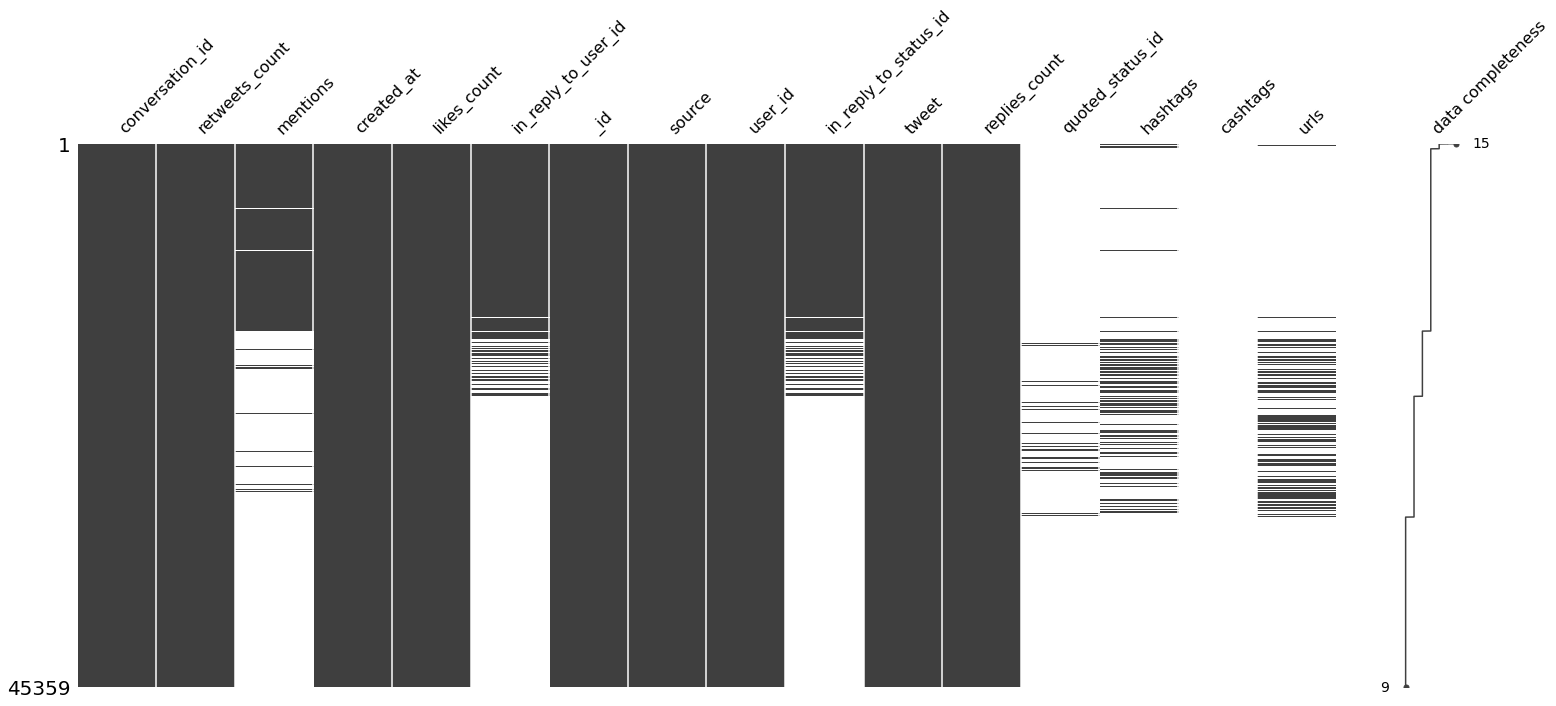

In [13]:
msno.matrix(tweets_df, labels=True, sort="descending")

In [14]:
# Droping samples that have more than 20% of missing values.
# tweets_df = tweets_df.dropna(thresh=tweets_df.shape[1] * 0.80, axis=0).reset_index(drop=True)
# tweets_df.shape

### Per Features

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

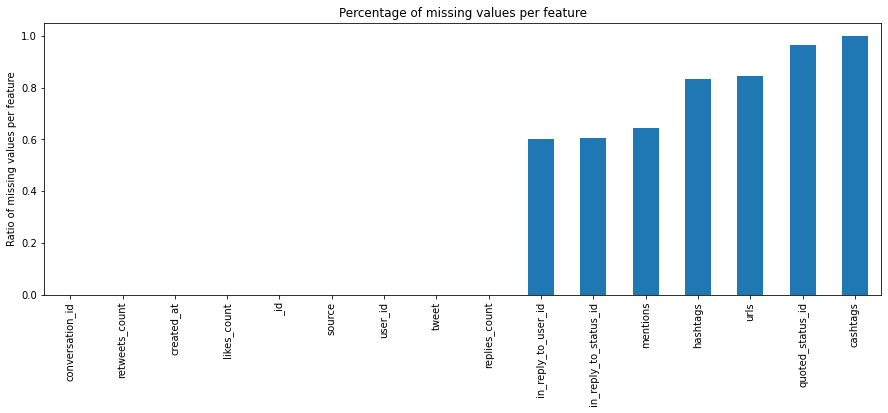

In [15]:
tweets_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 5),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

## Outlier Entries

### Numerical features

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

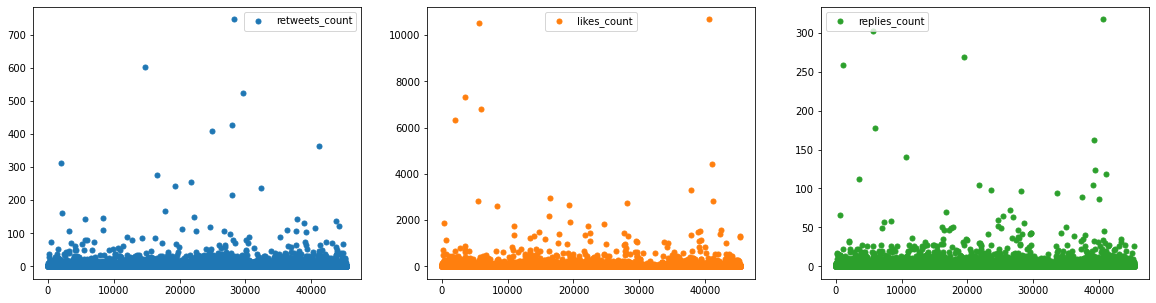

In [16]:
dropped_numeric_features = ["conversation_id", "in_reply_to_user_id", "_id", "user_id", "in_reply_to_status_id", "quoted_status_id"]
tweets_df.drop(labels=dropped_numeric_features, axis=1).plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 5), markersize=10)

# Content Investigation

## Feature distribution

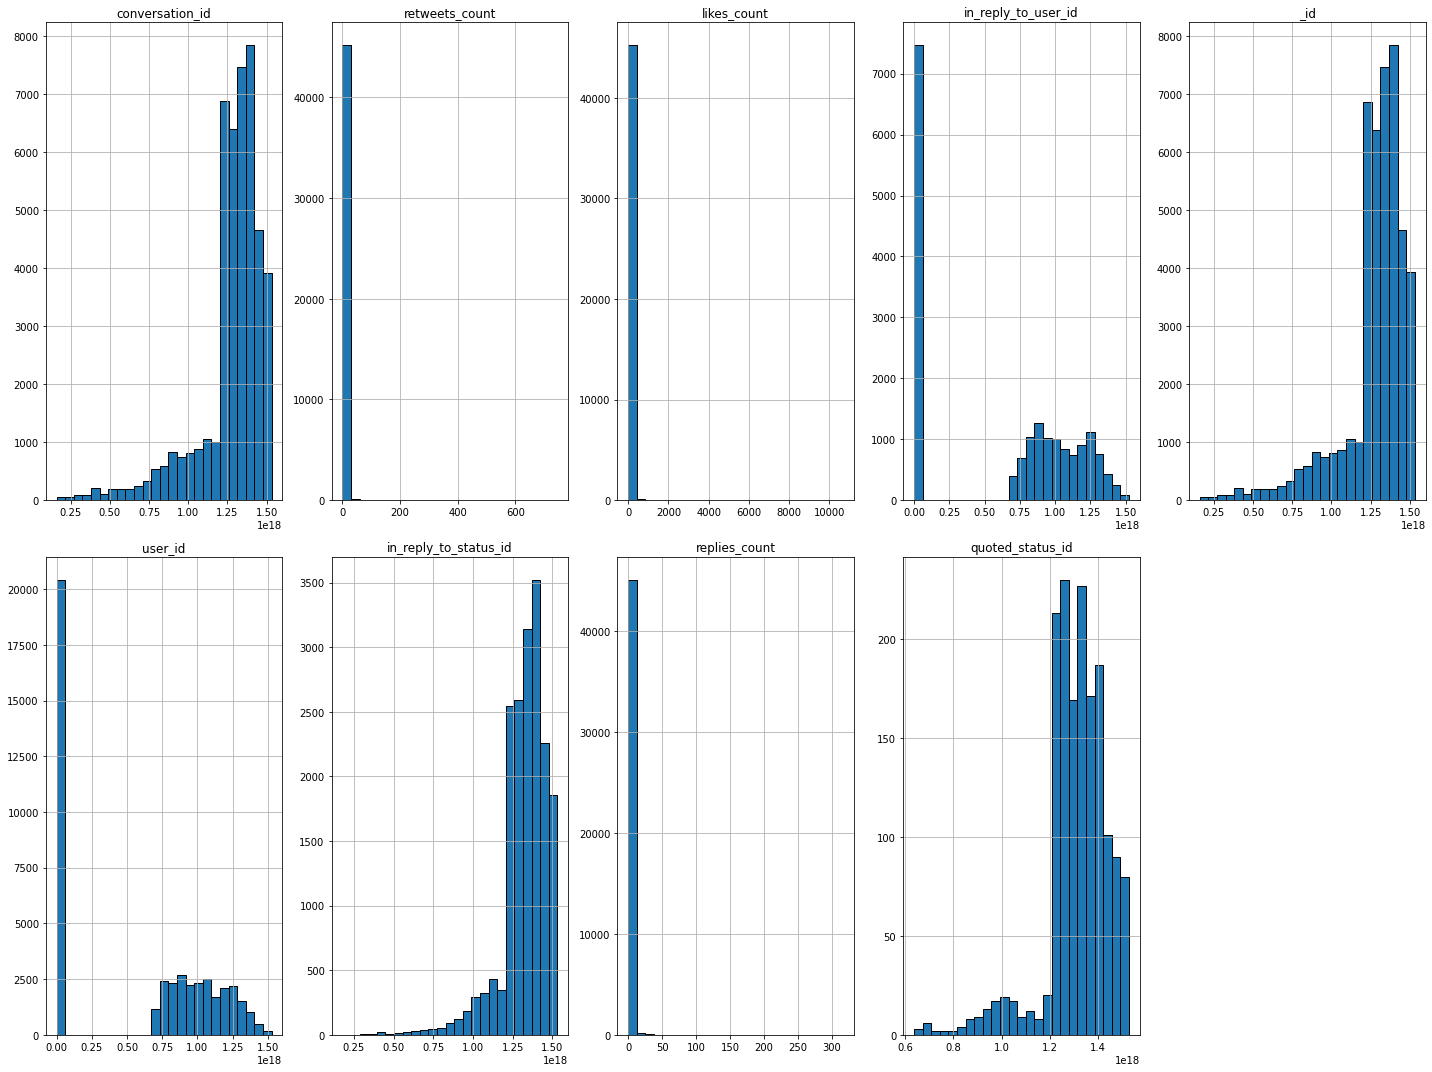

In [17]:
tweets_df.hist(bins=25, figsize=(20, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

## Continuous features

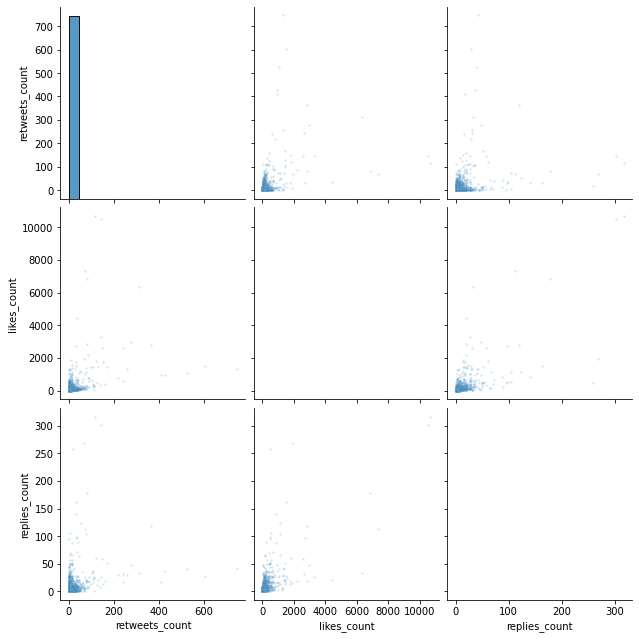

In [18]:
sns.pairplot(tweets_df.drop(labels=dropped_numeric_features, axis=1), height=3, plot_kws={"s": 5, "alpha": 0.2})

## Feature relationships

In [19]:
def get_corr(data_df, method="pearson"):
    df_corr =data_df.corr(method=method)
    # Create labels for the correlation matrix
    labels = np.where(np.abs(df_corr)>0.75, "S",
                      np.where(np.abs(df_corr)>0.5, "M",
                               np.where(np.abs(df_corr)>0.25, "W", "")))

    # Plot correlation matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
                center=0, annot=labels, fmt='', linewidths=.5,
                cmap="vlag", cbar_kws={"shrink": 0.8})

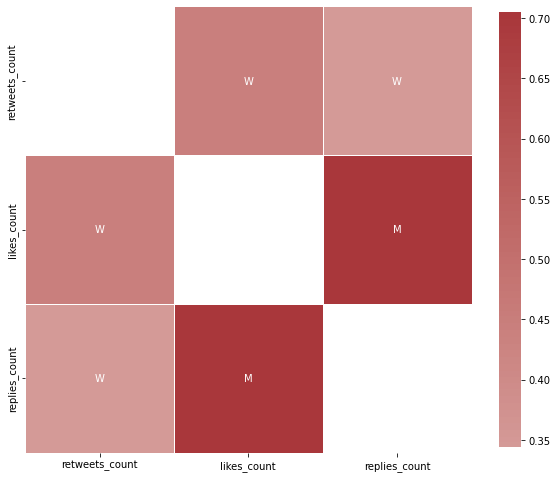

In [20]:
get_corr(tweets_df.drop(labels=dropped_numeric_features, axis=1))

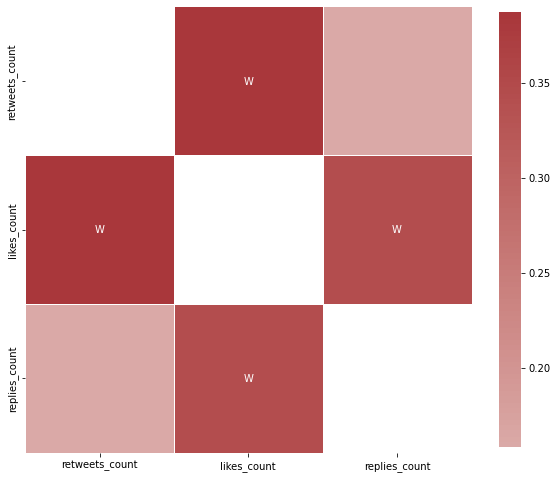

In [21]:
get_corr(tweets_df.drop(labels=dropped_numeric_features, axis=1), "spearman")

# Specific Columns

## Numerics

### Retweets

<AxesSubplot:xlabel='Retweet Count', ylabel='Log(Number of Users)'>

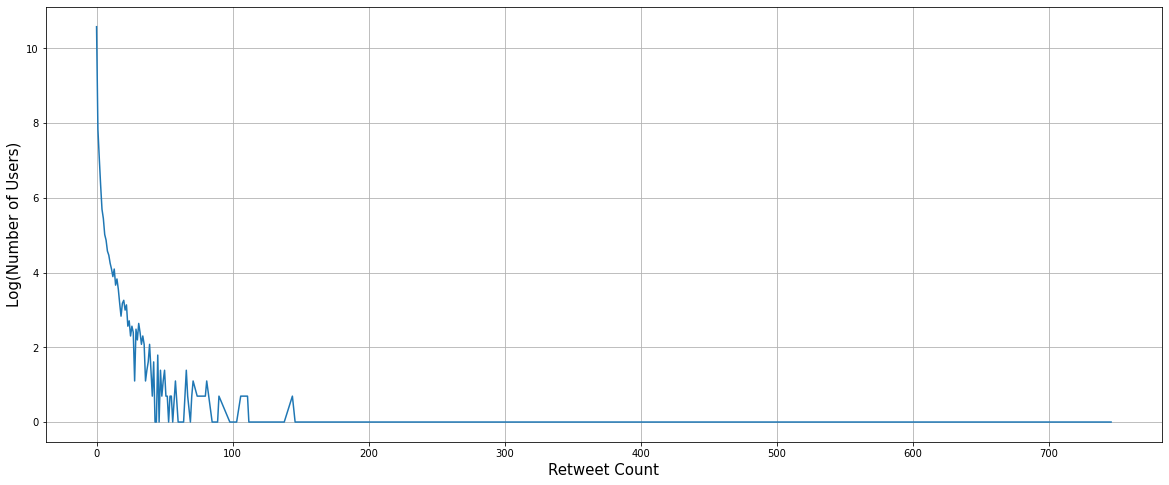

In [22]:
plt.figure(figsize=(20, 8))
plt.xlabel('Retweet Count', fontsize=15)
plt.ylabel('Log(Number of Users)', fontsize=15)
log_of_retweets = np.log(tweets_df['retweets_count'].value_counts().sort_index())
log_of_retweets.plot(grid=True)

### Likes

<AxesSubplot:xlabel='Like Count', ylabel='Log(Number of Users)'>

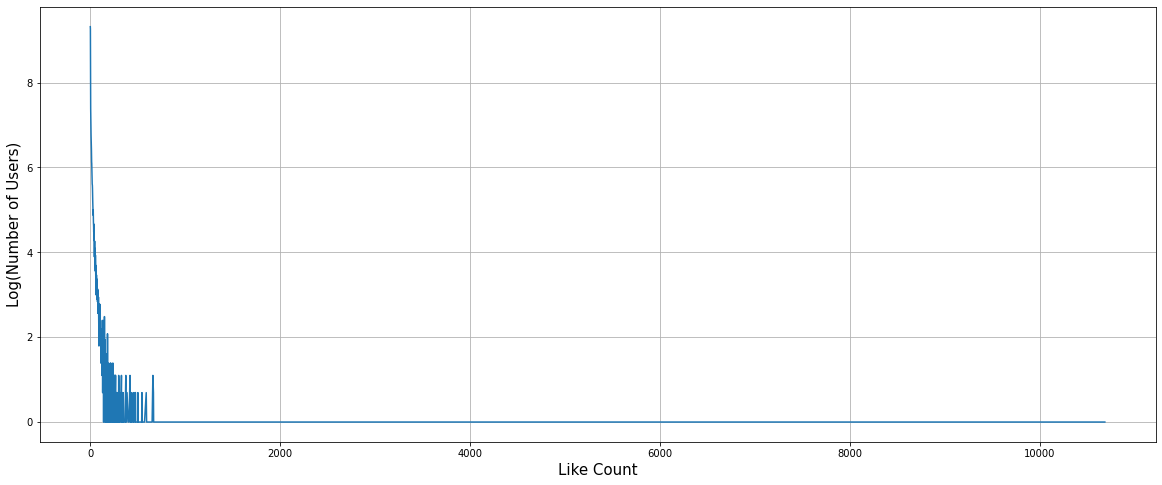

In [23]:
plt.figure(figsize=(20, 8))
plt.xlabel('Like Count', fontsize=15)
plt.ylabel('Log(Number of Users)', fontsize=15)
log_of_retweets = np.log(tweets_df['likes_count'].value_counts().sort_index())
log_of_retweets.plot(grid=True)

### Replies

<AxesSubplot:xlabel='Reply Count', ylabel='Log(Number of Users)'>

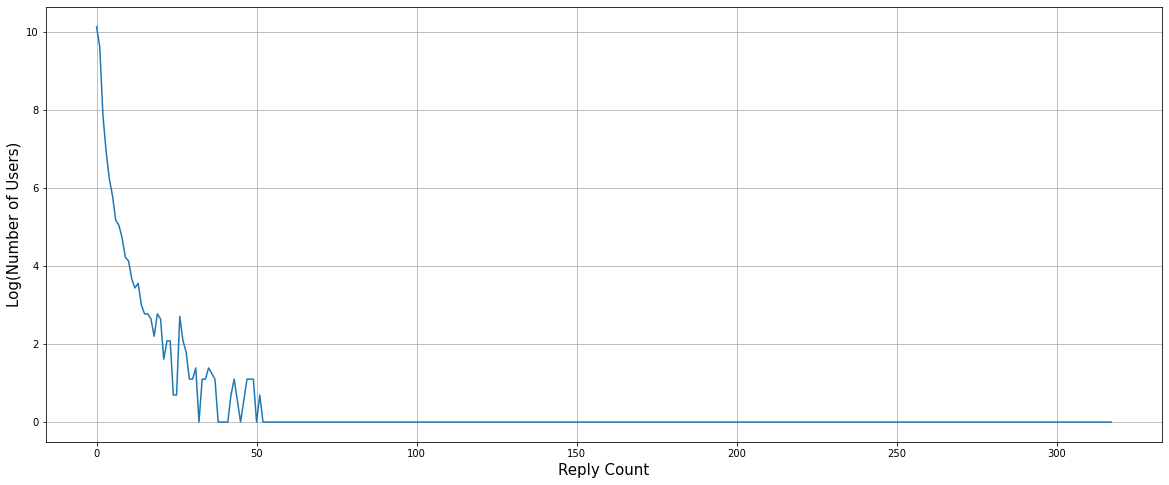

In [24]:
plt.figure(figsize=(20, 8))
plt.xlabel('Reply Count', fontsize=15)
plt.ylabel('Log(Number of Users)', fontsize=15)
log_of_retweets = np.log(tweets_df['replies_count'].value_counts().sort_index())
log_of_retweets.plot(grid=True)

## Creation Date

In [25]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at']).dt.date

In [26]:
tweets_per_day = tweets_df.groupby(['created_at']).count()['tweet']
tweets_per_day.head()

created_at
2012-01-21    2
2012-01-22    1
2012-01-23    1
2012-01-25    1
2012-01-27    1
Name: tweet, dtype: int64

Text(0, 0.5, 'Number of Tweets')

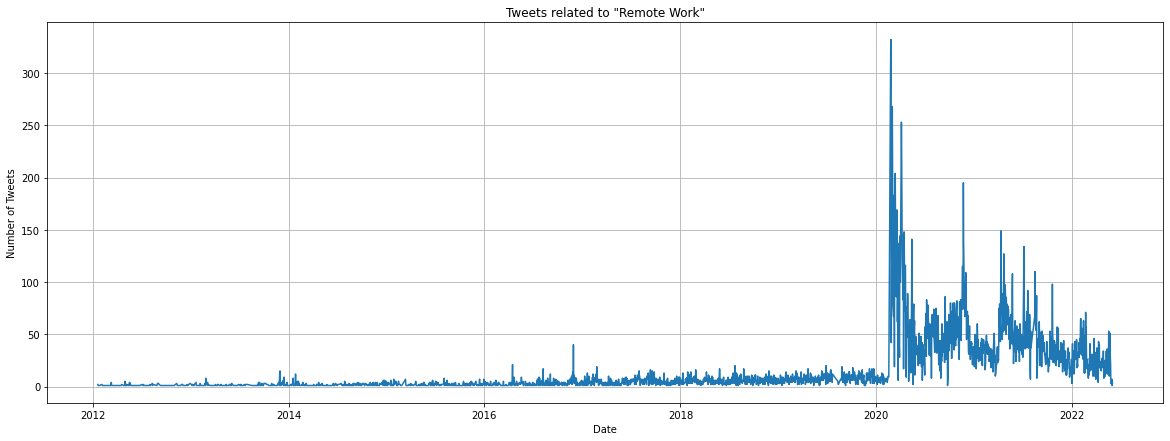

In [27]:
tweets_per_day.plot(figsize=(20, 7), grid=True)
plt.title('Tweets related to "Remote Work"')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

## Users Info

In [28]:
user_path = base_path + 'twitter_users.csv'
users_df = pd.read_csv(user_path)
users_df.head()

/tmp/ipykernel_16504/808887738.py:2: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv(user_path)


,_id,username,created_at,tweets,following,followers,likes,media_count,verified
0,1383635625019015169,sarayousefi19,2021-04-18 04:17:11 +0000,1.0,10.0,3.0,1.0,0.0,False
1,984363966632726528,FakhimAzadeh,2018-04-12 09:33:53 +0000,3.0,5.0,1.0,4.0,0.0,False
2,1162044331613708291,shrinsindi,2019-08-15 16:52:13 +0000,208.0,43.0,71.0,2593.0,1.0,False
3,1019139247952093184,Mohamad85279263,2018-07-17 08:38:26 +0000,2.0,14.0,1.0,1.0,0.0,False
4,1356165539505254400,cjiit,2021-02-01 09:07:00 +0000,546.0,100.0,35.0,344.0,29.0,False


In [29]:
tweets_df = pd.merge(tweets_df, users_df,  how='left', left_on=['user_id'], right_on = ['_id'])
tweets_df.head()

,conversation_id,retweets_count,mentions,created_at_x,likes_count,in_reply_to_user_id,_id_x,source,user_id,in_reply_to_status_id,...,urls,_id_y,username,created_at_y,tweets,following,followers,likes,media_count,verified
0,1375557622410149894,2,NaN,2021-03-26,111,572051429.0,1375559020451356674,Twitter for iPhone,572051429,1.375558e+18,...,NaN,572051429,Serpicoo3,2012-05-05 20:36:12 +0000,78692.0,863.0,13308.0,287609.0,833.0,False
1,1375559420176908296,3,NaN,2021-03-26,163,NaN,1375559420176908296,Twitter for iPhone,812764546012246017,NaN,...,NaN,812764546012246017,shahbazi_ar,2016-12-24 20:59:02 +0000,23987.0,1279.0,3432.0,296544.0,1035.0,False
2,1383828354197979136,2,NaN,2021-04-18,37,NaN,1383828354197979136,Twitter for Android,985101690536898565,NaN,...,NaN,985101690536898565,Marjianidavi,2018-04-14 10:25:20 +0000,74214.0,1763.0,2776.0,230731.0,5618.0,False
3,1383840315031781385,0,NaN,2021-04-18,11,NaN,1383840315031781385,Twitter Web App,310871673,NaN,...,NaN,310871673,farnam_violin,2011-06-04 14:06:54 +0000,113797.0,5085.0,5660.0,364212.0,4645.0,False
4,1383820625354002439,1,['15782990'],2021-04-18,9,15782990.0,1383835643239747593,Twitter Web App,1271095835028307969,1.383821e+18,...,NaN,1271095835028307969,ussamamad,2020-06-11 15:04:03 +0000,19887.0,172.0,7962.0,81120.0,944.0,False


### Source Users

In [30]:
source_users = tweets_df['username'].value_counts()
source_users

mahdiEsfahani2    1032
parsfl             668
marlik_job         559
bazar_kaar         229
kargadan           189
                  ... 
Gholam_Prompt        1
adighodsi            1
najmi_60             1
Fateme20A            1
abolfaz__mr          1
Name: username, Length: 19353, dtype: int64

<b>Top N users</b>

In [31]:
top_n = 20

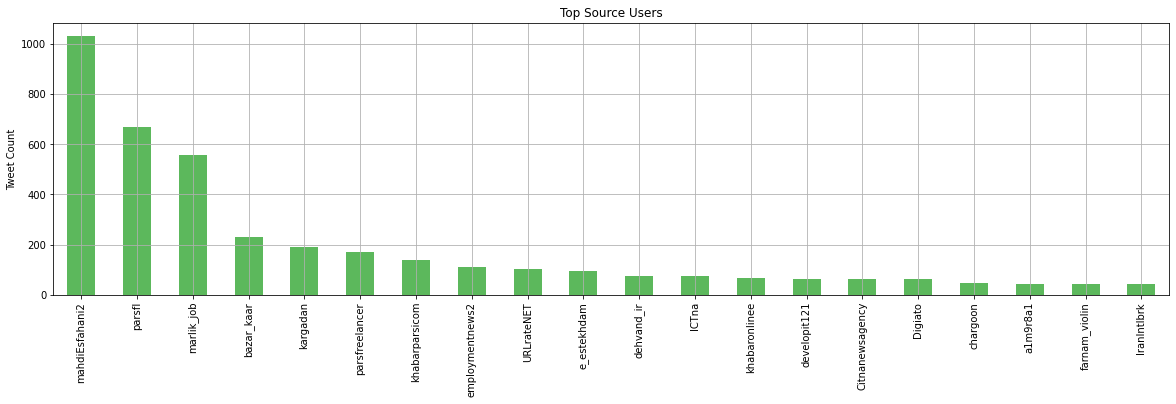

In [32]:
top_n_source_users = source_users[:top_n].plot(kind='bar', figsize=(20,5), title='Top Source Users',
                                                          ylabel = 'Tweet Count', color= '#5cb85c', grid=True)

### Destination Users

#### Based on Mentions

In [33]:
def get_list_value(str_val):
    if type(str_val) == str:
        return ast.literal_eval(str_val)
    else:
        return []

In [34]:
tweets_df['mentions'] = tweets_df['mentions'].progress_apply(lambda m: get_list_value(m))

100%|█████████████████████████████████| 45359/45359 [00:00<00:00, 333590.10it/s]


In [35]:
def get_all_mentions(data_df):
    mention_ids = {}
    for index, row in tqdm(data_df.iterrows()):
        for m in row['mentions']:
            if m in mention_ids:
                mention_ids[m] += 1
            else:
                mention_ids[m] = 1
    return mention_ids

mention_ids = dict(sorted(get_all_mentions(tweets_df).items(), key=lambda item: item[1], reverse=True))

45359it [00:01, 28027.60it/s]


<b>Top N users</b>

In [65]:
def get_usernames_by_ids(data_df, userids):
    usernames = []
    for i, user_id in tqdm(enumerate(userids)):
        user_info = data_df[data_df['_id'] == int(user_id)]
        if user_info.empty:
            usernames.append(str(user_id))
        else:
            usernames.append(user_info.iloc[0]['username'])
    return usernames

20it [00:07,  2.82it/s]


<BarContainer object of 20 artists>

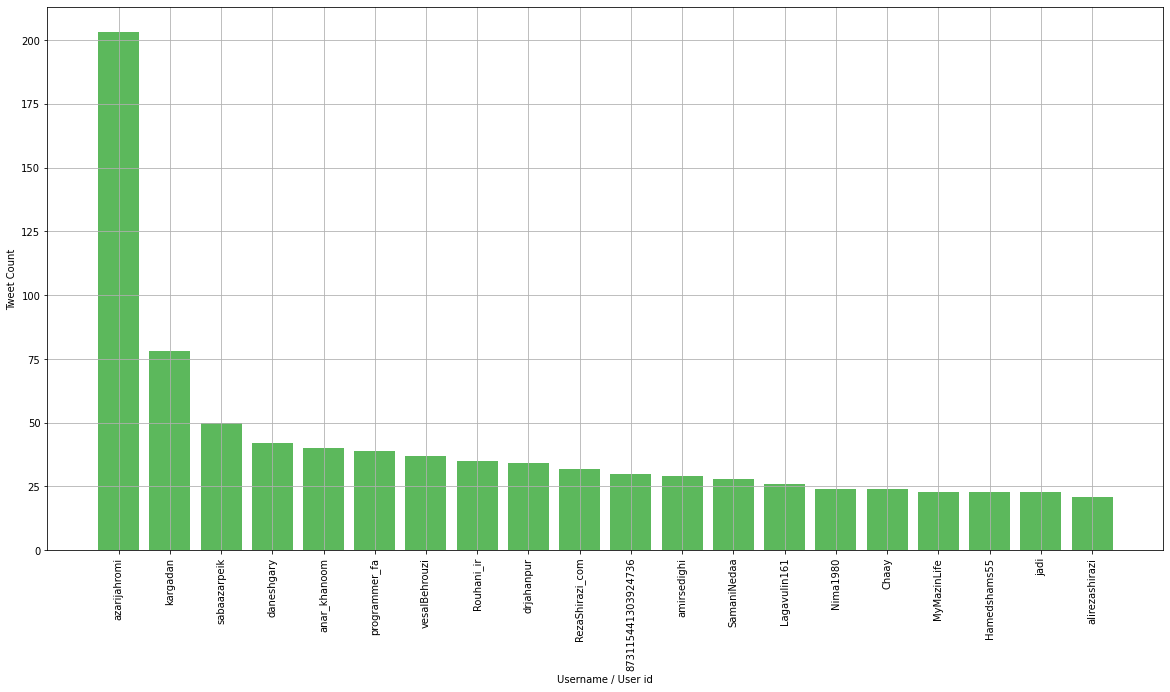

In [79]:
mention_keys = get_usernames_by_ids(users_df, list(mention_ids.keys())[:top_n])
mention_values = list(mention_ids.values())[:top_n]

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Username / User id")
plt.ylabel("Tweet Count")
plt.bar(mention_keys, mention_values, color="#5cb85c")

#### Based on replies

In [55]:
def get_int_value(x_val):
    if np.isnan(x_val):
        return -1
    else:
        return int(x_val)

In [56]:
type(tweets_df.iloc[0]['in_reply_to_user_id'])

numpy.float64

In [57]:
tweets_df['in_reply_to_user_id'] = tweets_df['in_reply_to_user_id'].progress_apply(lambda r: get_int_value(r))
tweets_df.head()

100%|█████████████████████████████████| 45359/45359 [00:00<00:00, 476475.29it/s]


,conversation_id,retweets_count,mentions,created_at_x,likes_count,in_reply_to_user_id,_id_x,source,user_id,in_reply_to_status_id,...,urls,_id_y,username,created_at_y,tweets,following,followers,likes,media_count,verified
0,1375557622410149894,2,[],2021-03-26,111,572051429,1375559020451356674,Twitter for iPhone,572051429,1.375558e+18,...,NaN,572051429,Serpicoo3,2012-05-05 20:36:12 +0000,78692.0,863.0,13308.0,287609.0,833.0,False
1,1375559420176908296,3,[],2021-03-26,163,-1,1375559420176908296,Twitter for iPhone,812764546012246017,NaN,...,NaN,812764546012246017,shahbazi_ar,2016-12-24 20:59:02 +0000,23987.0,1279.0,3432.0,296544.0,1035.0,False
2,1383828354197979136,2,[],2021-04-18,37,-1,1383828354197979136,Twitter for Android,985101690536898565,NaN,...,NaN,985101690536898565,Marjianidavi,2018-04-14 10:25:20 +0000,74214.0,1763.0,2776.0,230731.0,5618.0,False
3,1383840315031781385,0,[],2021-04-18,11,-1,1383840315031781385,Twitter Web App,310871673,NaN,...,NaN,310871673,farnam_violin,2011-06-04 14:06:54 +0000,113797.0,5085.0,5660.0,364212.0,4645.0,False
4,1383820625354002439,1,[15782990],2021-04-18,9,15782990,1383835643239747593,Twitter Web App,1271095835028307969,1.383821e+18,...,NaN,1271095835028307969,ussamamad,2020-06-11 15:04:03 +0000,19887.0,172.0,7962.0,81120.0,944.0,False


In [67]:
def get_all_replies(data_df):
    reply_ids = {}
    for index, row in tqdm(data_df.iterrows()):
        r_id = row['in_reply_to_user_id']
        if r_id != -1: 
            if r_id in reply_ids:
                reply_ids[r_id] += 1
            else:
                reply_ids[r_id] = 1
    return reply_ids

reply_ids = dict(sorted(get_all_replies(tweets_df).items(), key=lambda item: item[1], reverse=True))

45359it [00:01, 27967.76it/s]


20it [00:07,  2.84it/s]


<BarContainer object of 20 artists>

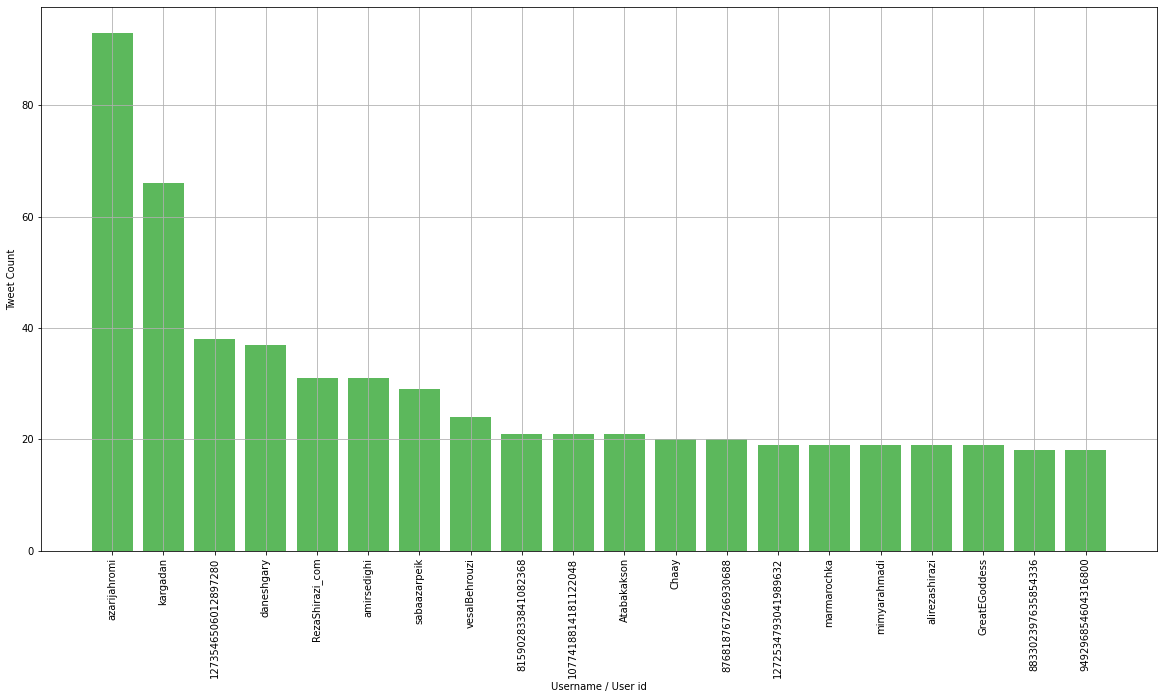

In [78]:
reply_keys = get_usernames_by_ids(users_df, list(reply_ids.keys())[:top_n])
reply_values = list(reply_ids.values())[:top_n]

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Username / User id")
plt.ylabel("Tweet Count")
plt.bar(reply_keys, reply_values, color="#5cb85c")

## Source

<AxesSubplot:title={'center':'Source of Tweets'}, ylabel='Percentage'>

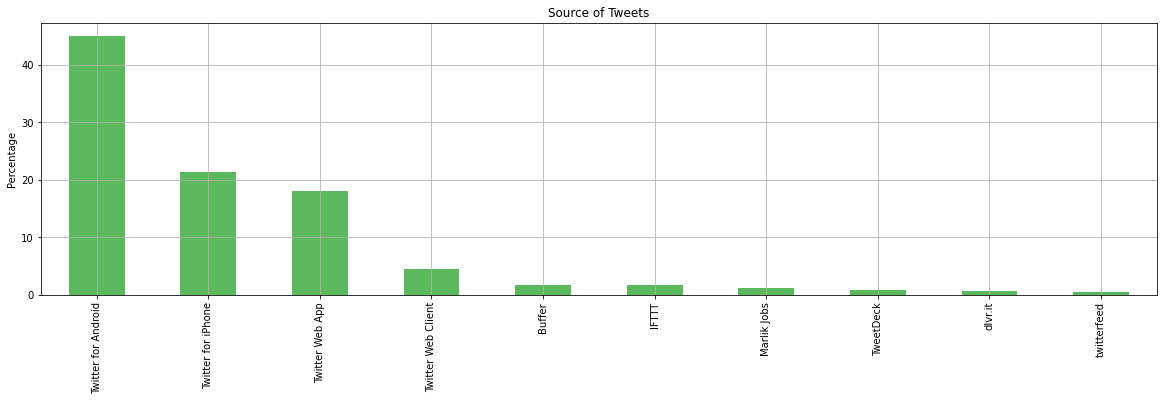

In [77]:
source_categories = tweets_df['source'].value_counts(normalize=True)[:10]* 100
source_categories
source_categories.plot(kind='bar', figsize=(20,5), title='Source of Tweets', ylabel = 'Percentage', color= '#5cb85c', grid=True)

## Urls

In [82]:
tweets_df['urls'] = tweets_df['urls'].progress_apply(lambda urls: get_list_value(urls))
tweets_df['urls_len'] = tweets_df['urls'].progress_apply(lambda urls: len(urls))
tweets_df.head()

,conversation_id,retweets_count,mentions,created_at_x,likes_count,in_reply_to_user_id,_id_x,source,user_id,in_reply_to_status_id,...,_id_y,username,created_at_y,tweets,following,followers,likes,media_count,verified,urls_len
0,1375557622410149894,2,[],2021-03-26,111,572051429,1375559020451356674,Twitter for iPhone,572051429,1.375558e+18,...,572051429,Serpicoo3,2012-05-05 20:36:12 +0000,78692.0,863.0,13308.0,287609.0,833.0,False,0
1,1375559420176908296,3,[],2021-03-26,163,-1,1375559420176908296,Twitter for iPhone,812764546012246017,NaN,...,812764546012246017,shahbazi_ar,2016-12-24 20:59:02 +0000,23987.0,1279.0,3432.0,296544.0,1035.0,False,0
2,1383828354197979136,2,[],2021-04-18,37,-1,1383828354197979136,Twitter for Android,985101690536898565,NaN,...,985101690536898565,Marjianidavi,2018-04-14 10:25:20 +0000,74214.0,1763.0,2776.0,230731.0,5618.0,False,0
3,1383840315031781385,0,[],2021-04-18,11,-1,1383840315031781385,Twitter Web App,310871673,NaN,...,310871673,farnam_violin,2011-06-04 14:06:54 +0000,113797.0,5085.0,5660.0,364212.0,4645.0,False,0
4,1383820625354002439,1,[15782990],2021-04-18,9,15782990,1383835643239747593,Twitter Web App,1271095835028307969,1.383821e+18,...,1271095835028307969,ussamamad,2020-06-11 15:04:03 +0000,19887.0,172.0,7962.0,81120.0,944.0,False,0


In [97]:
tweets_df['year'] = tweets_df['created_at_x'].progress_apply(lambda d: d.year)
tweets_df['month'] = tweets_df['created_at_x'].progress_apply(lambda d: d.month)

100%|█████████████████████████████████| 45359/45359 [00:00<00:00, 960138.05it/s]


<AxesSubplot:xlabel='year,month'>

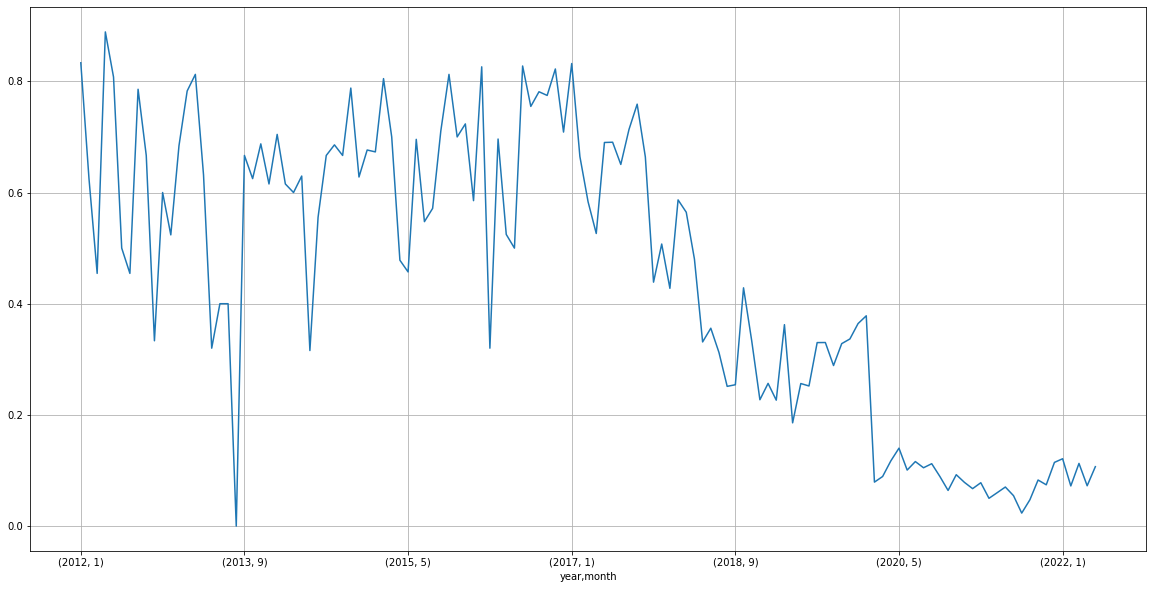

In [100]:
tweets_per_month = tweets_df.groupby(['year', 'month']).count()['tweet']

url_rate_per_month = tweets_df.groupby(['year', 'month'])['urls_len'].sum() / tweets_per_month
url_rate_per_month
url_rate_per_month.plot(figsize=(20, 10), grid=True)
#     axes[i].set_title('Relative Percentage of ' + col + ' Tweets over Time')
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('Percentage')

# Contextual Data Investigation

## Hashtags

## Tweets